# Summary:
As previously explained, there are two parts to how a movement between point A and point B might vary. The second part is the speed of the movement. Here, I calculate the average speed, `s`, of each __Hit__ trial's movement, defined as $\frac{100}{\text{time}}$ in units of % movement/s. I then find the mean of these average speeds, `mean_s`, and variance of these average speeds, `var_s`, across all trials for the day.

### imports

In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import scipy.interpolate as interpolate
import pickle
import glob # find files in a directory
import re # regex for string parsing

### set `folder_name`

In [2]:
folder_name = './Data/AnB1/'
lever_data_folder = "./Data/AnB1/LeverData_ANB1_d1/"
lever_data_matfile = "./Data/AnB1/LeverData_ANB1_d1.mat"
output_folder = "./Data/AnB1/analysis4_ANB1/"
!mkdir {output_folder}

mkdir: ./Data/AnB1/analysis4_ANB1/: File exists


### sort through relevant .mat files found in folder by day ("_d#")

In [3]:
unsorted_analysis2_folders = glob.glob(folder_name+'analysis2_ANB1*/')
sorted_analysis2_folders = sorted(unsorted_analysis2_folders, key=lambda x: int(re.search(r'\d/$',x).group()[:-1]))
sorted_analysis2_folders

['./Data/AnB1/analysis2_ANB1_d1/']

### Get `var_s` and `mean_s`
- For each day, go to corresponding analysis2 folder
    - Find `mean_s` and `var_s` for that day:
        - For each movement from that day, get the total time it took to do the entire movement
        - Calculate an overall average speed defined as $\frac{100}{\text{time}}$ in units of % movement/s
    - Then, find the variance and mean of these average speeds, `var_s` and `mean_s`, respectively, for all movements from a day
    - Append to `vars_vs` and `mean_ss`

In [6]:
var_ss = []
mean_ss = []
# loop through all analysis2 folders for each day
for analysis2_folder in sorted_analysis2_folders:

    vs = []
    # loop through all movements from that day
    for movement_file in glob.glob(analysis2_folder+'movement_trial*.npy'):
        movement_data = np.load(movement_file)
        time = (movement_data[0, -1] - movement_data[0, 0])
        print("time for total movement: ", time, "s")
        vs.append(100 / time)

    print("minimum velocity in %/s: ", np.min(vs))
    print("maximum velocity in %/s: ", np.max(vs))
    var_ss.append(np.var(vs))
    mean_ss.append(np.mean(vs))
    
var_ss = np.array(var_ss)
mean_ss = np.array(mean_ss)

time for total movement:  4.000994858338075 s
time for total movement:  7.181991195593355 s
time for total movement:  3.52710663571645 s
time for total movement:  5.762275634959906 s
time for total movement:  2.6777836289149946 s
time for total movement:  2.193707296474429 s
time for total movement:  3.098548423158036 s
time for total movement:  6.593054364796188 s
time for total movement:  5.835351440671673 s
time for total movement:  0.04488061773122354 s
time for total movement:  1.9927909479387154 s
time for total movement:  0.4965835178816178 s
time for total movement:  4.983921812434801 s
time for total movement:  2.617027304908106 s
time for total movement:  3.895655595206989 s
time for total movement:  2.048696223312902 s
time for total movement:  1.8902763223561578 s
time for total movement:  5.132433895588974 s
time for total movement:  3.5847155451707096 s
time for total movement:  0.42482824805079034 s
time for total movement:  4.176110788989035 s
time for total movement:  

### Plot `var_ss` and `mean_ss` across days

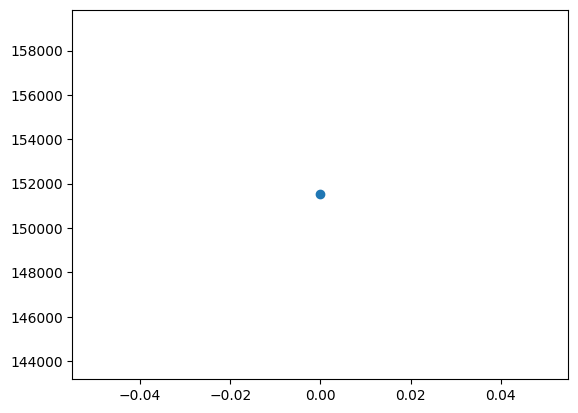

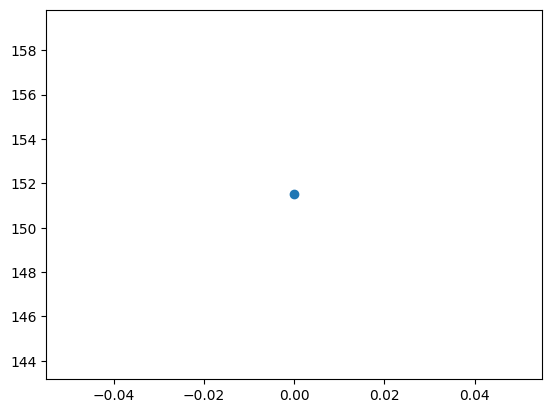

In [8]:
plt.scatter(range(0, len(var_ss)), var_ss)
plt.show()

plt.scatter(range(0, len(mean_ss)), mean_ss)
plt.show()

Save `var_ss` and `mean_ss`

In [9]:
np.save(output_folder+"var_ss", var_ss)
np.save(output_folder+"mean_ss", mean_ss)